<table style="width:100%; float:center; background-color:#FFFFFF" align="left">
<tr>
<td style="text-align:left; background-color:#FFFFFF"><div class="pull-left">

PD Dr. Ralf Klamma <br>
A. Neumann <br> 
M. Kißgen <br>
L. Pieschel <br>
I. Ni <br>
B. Zhvania
</div>

<div class="pull-right">

<h4>05.11.2021</h4>

</div></td>
<td style="text-align:right; background-color:#FFFFFF">
<div>
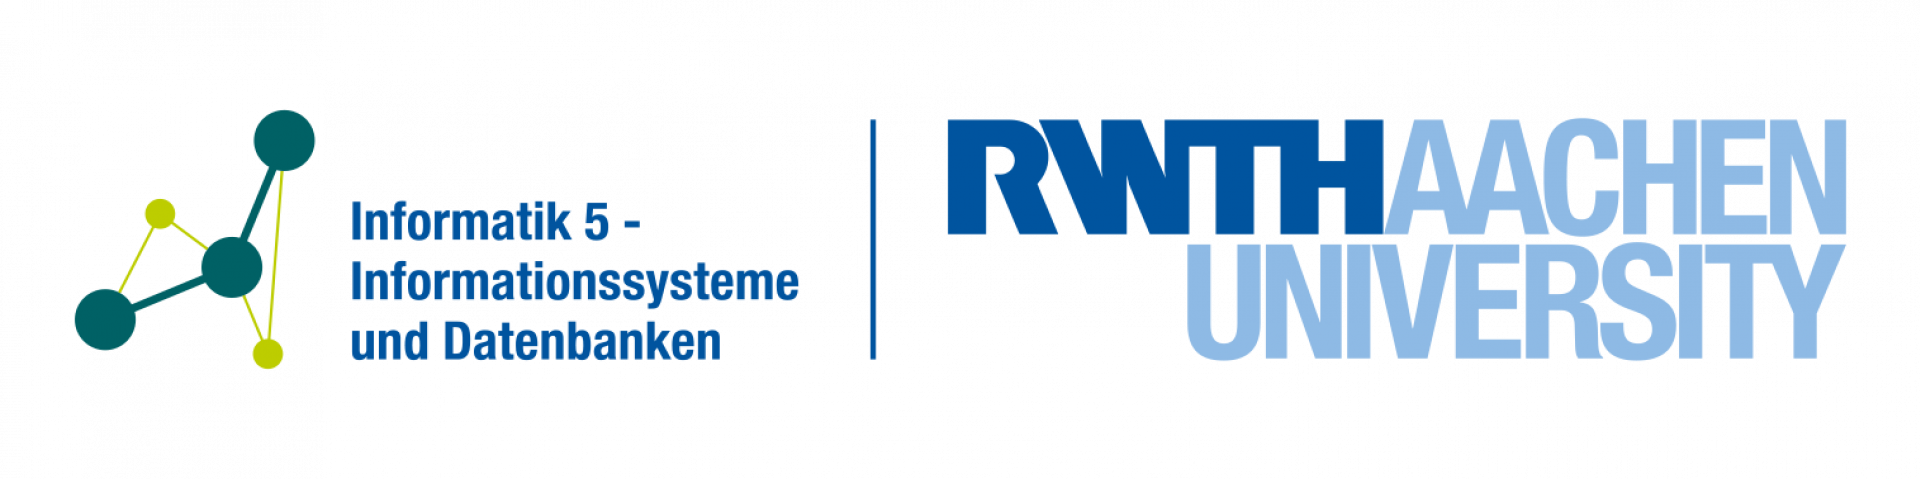
</td></tr>
</table>

## Sources of Further Information

The following links lead to documentation that may be helpful/necessary for solving the tasks.

[Python Documentation](https://docs.python.org/3/)  
[NumPy Reference](https://numpy.org/doc/stable/reference/index.html)  
[NetworkX Reference](https://networkx.org/documentation/stable/reference/index.html)  
[Matplotlib](https://matplotlib.org/stable/contents.html)

## Prerequisites

Run the following cell every time you open the notebook to ensure everything works as intended.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import networkx as nx
from scipy import sparse

## Remarks for Jupyter Notebook exercises

**Please read these carefully**
1. Do **not** remove, duplicate or add cells.
2. As most of these exercises are automatically graded, please **read the exercises carefully** and use the proposed variable and function names.
3. Autograded exercises are followed by a test cell. This cell is a placeholder for hidden unit-tests. Sometimes some of the tests will be visible such that you can check parts of your solution. Otherwise just ignore these cells. 
4. **Do not compress** or otherwise manipulate the filetype (.ipynb). Just fill in your answers and upload it to moodle directly.
5. Have fun and play around but check that there are no errors and everything is correct before handing in your solution.
6. **Comment your code!** This helps you and me find errors and even erroneous code may give points if it contains comprehensible comments.

Not following these remarks may result in lost points. If you have any questions concerning the exercises or the grading, please use the exercise forum in moodle.

Happy coding!

---

# Social Computing Exercise 2 [15 points]

## **Matriculation numbers**
Please fill in the names and matriculation numbers of your team:
1. Seyed Pouria Mirelmi (416910)
2. Sayed Mahdi Raghib (416924)
3. Nina Tsarskaya (430160)

(Double-click this cell to edit it)

---
## Exercise 2.3: Information Cascades and Heterogeneous Threshold [15 points]

Cascading behaviour is very common in social networks. Examples are spreading of news, rumors, behaviours (like smoking or recycling) and viruses/diseases. This diffusion of information happens mostly on a local level. **Network Coordination Games** are a model simulating such local cascading behaviour.

### Network Coordination Games

We will consider the following social graph (execute next cell to draw graph):

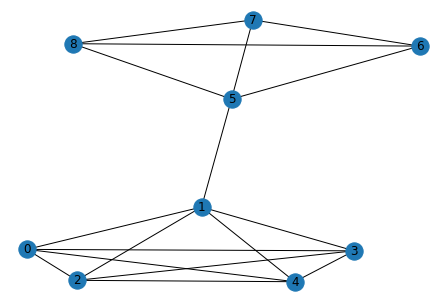

In [2]:
test_adj = np.array([[0,1,1,1,1,0,0,0,0],
                [1,0,1,1,1,1,0,0,0],
                [1,1,0,1,1,0,0,0,0],
                [1,1,1,0,1,0,0,0,0],
                [1,1,1,1,0,0,0,0,0],
                [0,1,0,0,0,0,1,1,1],
                [0,0,0,0,0,1,0,1,1],
                [0,0,0,0,0,1,1,0,1],
                [0,0,0,0,0,1,1,1,0]])
simple_graph = nx.Graph(test_adj)
nx.draw(simple_graph, with_labels=True)

In the above graph, nodes 0 to 4 as well as nodes 5 to 8 build cliques. The only connection between these two cliques exists between node 1 and 5. This can be regarded as two groups of friends between which only two people know each other.

Now we will introduce two mutually exclusive social behaviours, A and B. These behaviours only have a payoff if a node and its neighbour adopt it. If we say that behaviour A has a payoff of a and B of b, then this gives us a payoff matrix looking like this:

<table>
    <tr>
        <th>Behaviour</th><th>A</th><th>B</th>
    </tr>
    <tr>
        <th>A</th><th>(a, a)</th><th>(0, 0)</th>
    </tr>
    <tr>
        <th>B</th><th>(0, 0)</th><th>(b, b)</th>
    </tr>
</table>

Setting $a=1$ and $b=2.5$ yields the following payoff matrix:

<table>
    <tr>
        <th>Behaviour</th><th>A</th><th>B</th>
    </tr>
    <tr>
        <th>A</th><th>(1, 1)</th><th>(0, 0)</th>
    </tr>
    <tr>
        <th>B</th><th>(0, 0)</th><th>(2.5, 2.5)</th>
    </tr>
</table>

Looking at this matrix, it is simple to see that behaviour B dominates A. But does this necessarily mean that everyone will adopt it? To answer this question, you will implement the Network Coordination Game and observe its dynamics using different types of thresholds.

### Exercise 2.3a: Network Coordination Game with Homogeneous Threshold [4 points]

In a Network Coordination Game, each timestep all nodes in the graph play with all their neighbours. If a neighbour implements the same behaviour, then the payoff of said behaviour will be added to the nodes score. Then each node checks whether its score can be increased by changing behaviours. If so, then the node will switch its behaviour for the next timestep.

As the payoffs stay the same, this computation can be simplified by calculating the ratio of payoffs $ q = \frac{b}{a+b} $ , as well as the ratio of neighbours implementing a strategy $ p = \frac{n_A}{n_A+n_B} $, in which $n_A$ is the number of neighbours implementing strategy A, and $n_A + n_B$ the total number of neighbours. Then both these ratios can be compared to decide whether a node should or shouldn't switch behaviours. **For ties, strategy A should win**.

To store which node follows which behaviour, we will use a NumPy array `strategies` of size $n\times 2$ where $n$ is the number of nodes and a row $\text{strategies}_i=[1,0]$ means node i implements behaviour A and $\text{strategies}_j=[0,1]$ means node j implements behaviour B.

Implement a function to perform one timestep of the Network Coordination Game, `new_strategies = network_coordination_game(adj, strategies, payoff_a, payoff_b)` in which:
- `adj` is the adjacency matrix of the network as NumPy array.
- `strategies` is the strategy array for the current timestep, as explained above.
- `payoff_a` is the payoff of strategy A as float value.
- `payoff_b` is the payoff of strategy B as float value.
- Return value `new_strategies` is the updated strategy matrix for the next timestep with the same type and layout as `strategies`.

Hints:
- A simple way of counting how many neighbours use which strategy is multiplying (matrix multiplication) the adjacency matrix with the strategy matrix. Matrix multiplication in NumPy is done using the `@` operator or `np.matmul`.
- First calculate p for each node and q, then generate the new strategy matrix.

In [3]:
def network_coordination_game(adj, strategies, payoff_a, payoff_b):
    # Your code here
    
    counter_mat = adj @ strategies # the matrix that counts how many neighbors use which strategy
    new_strategies = [] # the new_strategies list which will return the final new strategies in the end
    
    for i in range (adj.shape[0]):
        nA = counter_mat[i][0] # number of the neighbors that use strategy A
        nB = counter_mat[i][1] # number of the neighbors that use strategy B
        p = nA / (nA + nB) # calculating p, according to the formula
        q = payoff_b / (payoff_a + payoff_b) # calculating q, according to the formula
        if (p >= q): # checking the condition to switch the behaviors
            new_strategies.append([1,0])
        else:
            new_strategies.append([0,1])
    
    return new_strategies

In [4]:
# This is a test cell. Execute it to verify your solution.
# Generate strategy matrix with all nodes implementing A
strats = np.array([[1,0] for node in simple_graph])
# Set node 1 and 5 to use strategy B
strats[[1,5]] = [0,1]
# Execute one timestep of the network coordination game
new_strats = network_coordination_game(test_adj, strats, 1, 2.5)
expect = np.array([[1, 0],[1, 0],[1, 0],[1, 0],[1, 0],[1, 0],[0, 1],[0, 1],[0, 1]])
assert((new_strats==expect).all()), f"There seems to be an error. Expected:\n{expect}\nGot:\n{new_strats}"

---
### Exercise 2.3b: Cascades and Clusters [3 points]

We will now look at the dynamic of the game using the two clique graph [defined above](#Network-Coordination-Games).

Execute the next cell and continue.

In [5]:
# This cell defines a simple function for drawing graphs with nodes colored by strategy
# If your graph has a bad layout, execute this cell again to reset
last_pos = None
def draw_strategy_graph(adj, strategies, title=None, thresholds=None):
    global last_pos
    from matplotlib.lines import Line2D
    colors = ['blue' if strategies[i,0]==1 else 'red' for i in range(adj.shape[0])]
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Strategy A',
                          markerfacecolor='b', markersize=15),
                      Line2D([0], [0], marker='o', color='w', label='Strategy B',
                          markerfacecolor='r', markersize=15)]
    g = nx.Graph(adj)
    pos = None
    if last_pos is not None and len(last_pos) == adj.shape[0]:
        pos = last_pos
    else:
        pos = nx.spring_layout(g)
        last_pos = pos
    nx.draw(g, pos, node_color=colors, with_labels=True, font_color='w')
    plt.legend(handles=legend_elements)
    plt.title(title)
    if thresholds is not None:
        label_positions = [(pos[p][0], pos[p][1]+0.12) for p in pos]
        labels = {i: f"{thresholds[i]:.3f}" for i in range(adj.shape[0])}
        nx.draw_networkx_labels(g, label_positions, labels)
    plt.show()

The game will start with all nodes but 1 and 5 implementing strategy A. To give the nodes an incentive to switch, nodes 1 and 5 will instead start with strategy B. We will then perform timesteps until the strategy matrix doesn't change. Use the payoffs $a=1$ and $b=2.5$. Also draw the network each step using the function `draw_strategy_graph(adj, strategies, title)` defined in the above cell (omit the parameter `thresholds` for now, it is optional).

Store the strategy matrix of each timestep in the already defined `results` list.

Hints:
- Mind that `results[0]` is already defined as the initial strategy matrix explained above.
- `results[1]` is the strategy matrix after the first step.
- As we terminate after the strategy matrix doesn't change, **`results` will contain the last constellation twice.**
- You won't need most of the 20 entries of `results`. Leave all remaining fields as `None`.

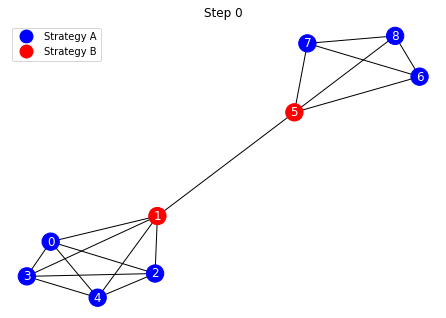

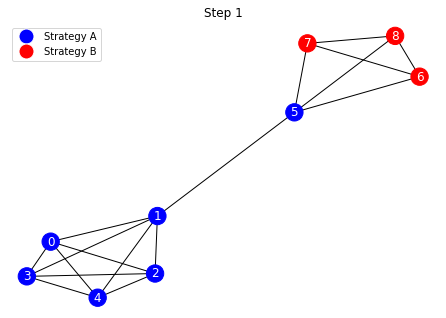

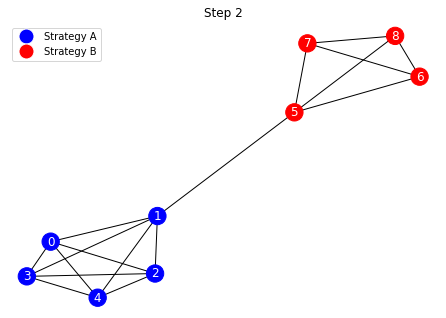

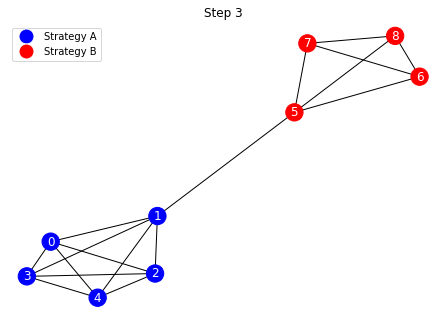

In [6]:
# Adjacency matrix of network
adj_matrix = np.array([[0,1,1,1,1,0,0,0,0],
                [1,0,1,1,1,1,0,0,0],
                [1,1,0,1,1,0,0,0,0],
                [1,1,1,0,1,0,0,0,0],
                [1,1,1,1,0,0,0,0,0],
                [0,1,0,0,0,0,1,1,1],
                [0,0,0,0,0,1,0,1,1],
                [0,0,0,0,0,1,1,0,1],
                [0,0,0,0,0,1,1,1,0]])
# Results list with 20 empty entries
results = [None]*20
# Generate initial strategies
initial_strategies = np.array([[1,0]]*adj_matrix.shape[0])
# Switch behaviour of node 1 and 5 to B
initial_strategies[[1,5]] = [0,1]
# Enter initial strategies into result list
results[0] = initial_strategies
# Draw initial graph with strategies
draw_strategy_graph(adj_matrix, results[0], "Step 0")

# Your code here

results[1] = np.array(network_coordination_game(adj_matrix, results[0], 1, 2.5))
draw_strategy_graph(adj_matrix, results[1], "Step 1")

results[2] = np.array(network_coordination_game(adj_matrix, results[1], 1, 2.5))
draw_strategy_graph(adj_matrix, results[2], "Step 2")

results[3] = np.array(network_coordination_game(adj_matrix, results[2], 1, 2.5))
draw_strategy_graph(adj_matrix, results[3], "Step 3")

In [7]:
# This is a test cell. Execute it to verify your solution
expect = np.array([[1, 0],[1, 0],[1, 0],[1, 0],[1, 0],[1, 0],[0, 1],[0, 1],[0, 1]])
assert((expect == results[1]).all()), f"There seems to be an error. Expected:\n{expect}\nGot:\n{results[1]}"

### Exercise 2.3c: Observation 1 [2 points]

What is remarkable about the cascading process from 2.3b given the network, initial constellation and payoff matrix? Give your answer in the cell below!

YOUR ANSWER HERE

As we can see from the illustrations, the strategy B cannot cause a complete cascade in the network. After step 2, it has to break into the tightly-knit community of the set {0,1,2,3,4}, which is a cluster of density 0.8.

This incomplete cascade was predictable, because in the beginning, by excluding nodes 1 and 5, we have the remaining network in such a way that it has at least a cluster with density greater than 1-q (1 - 5/7 = 2/7), so the set of initial adopters (1 and 5) could not have caused a complete cascade.

---
### Exercise 2.3d: Heterogeneous Threshold [4 points]

Even though the Network Coordination Game with homogeneous thresholds approximates the spread of information, it does not account for people who are either very easy or very hard to influence. For this, we will now introduce heterogeneous thresholds. Each node $v$ will now have its own pair of payoffs $a_v$ and $b_v$ for both strategies. For a node $v$ and its neighbour $w$, the payoff matrix will then look like this:

<table>
    <tr>
        <th>Behaviour</th><th>A</th><th>B</th>
    </tr>
    <tr>
        <th>A</th><th>($a_v$, $a_w$)</th><th>(0, 0)</th>
    </tr>
    <tr>
        <th>B</th><th>(0, 0)</th><th>($b_v$, $b_w$)</th>
    </tr>
</table>

While $p$, the ratio of neighbors implementing strategy A, stays the same, each node now has its own threshold $q_v = \frac{b_v}{a_v + b_v}$.

Similar to 2.3a, implement a function `new_strategies = network_coordination_game_ht(adj, strategies, payoffs_a, payoffs_b)`, which simulates one timestep of a Network Coordination Game with heterogeneous thresholds.

- `adj` is the adjacency matrix as NumPy array. (Same as before)
- `strategies` is the strategy matrix. (Same as before)
- `payoffs_a` and `payoffs_b` are now NumPy arrays of shape $n\times 1$, in which row i corresponds to the payoff value of node i.
- `new_strategies` is the updated strategy matrix. (Same as before)

Hints:
- This function should look very similar to the one from 2.3a. Maybe even the same.

In [8]:
def network_coordination_game_ht(adj, strategies, payoffs_a, payoffs_b):
    # Your code here
    
    counter_mat = adj @ strategies # the matrix that counts how many neighbors use which strategy
    new_strategies = [] # the new_strategies list which will return the final new strategies in the end
    
    for i in range (adj.shape[0]):
        nA = counter_mat[i][0] # number of the neighbors that use strategy A
        nB = counter_mat[i][1] # number of the neighbors that use strategy B
        p = nA / (nA + nB) # calculating p, according to the formula
        q = payoffs_b[i] / (payoffs_a[i] + payoffs_b[i]) # calculating q, according to the new formula
        if (p >= q): # checking the condition to switch the behaviors
            new_strategies.append([1,0])
        else:
            new_strategies.append([0,1])
    
    return new_strategies

Now do the same as in exercise 2.3b with heterogeneous thresholds:  
Simulate the game using the given payoff vectors `payoffs_a` and `payoffs_b`. Store the result of each step in the `results` list and draw the graph in each step using the function `draw_strategy_graph(adj, strategies, title, thresholds)`. When drawing also provide the `thresholds` parameter, which is a NumPy array of shape $n\times 1$ containing the thresholds $q_v$ for each node $v$.

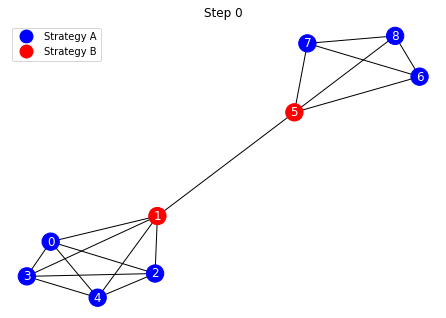

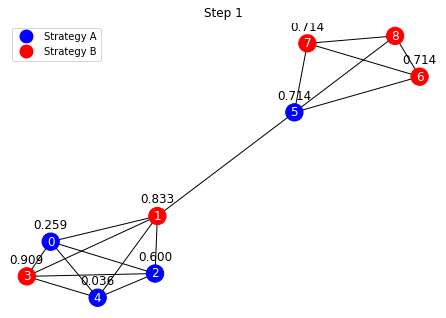

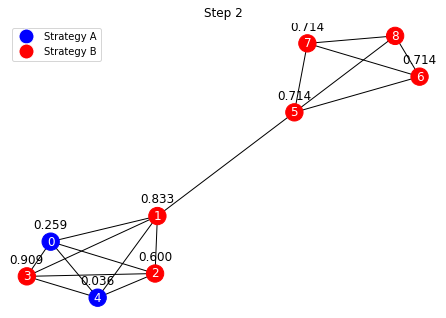

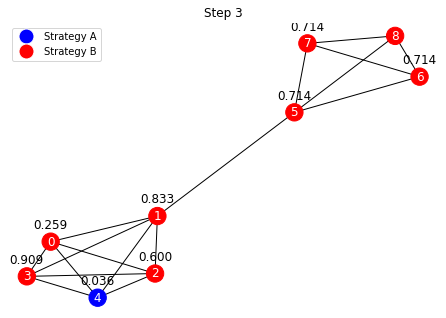

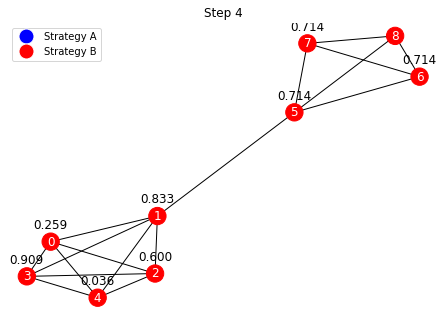

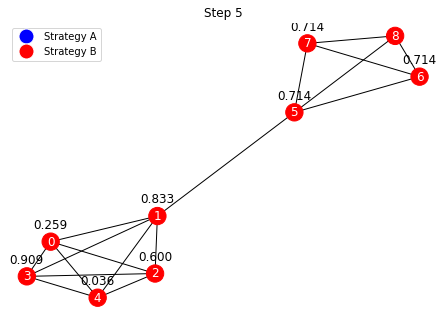

In [9]:
# Adjacency matrix of network
adj_matrix = np.array([[0,1,1,1,1,0,0,0,0],
                [1,0,1,1,1,1,0,0,0],
                [1,1,0,1,1,0,0,0,0],
                [1,1,1,0,1,0,0,0,0],
                [1,1,1,1,0,0,0,0,0],
                [0,1,0,0,0,0,1,1,1],
                [0,0,0,0,0,1,0,1,1],
                [0,0,0,0,0,1,1,0,1],
                [0,0,0,0,0,1,1,1,0]])
# Results list with 20 empty entries
results = [None]*20
# Generate initial strategies
initial_strategies = np.array([[1,0]]*adj_matrix.shape[0])
# Switch behaviour of node 1 and 5 to B
initial_strategies[[1,5]] = [0,1]
# Enter initial strategies into result list
results[0] = initial_strategies
# Draw initial graph with strategies
draw_strategy_graph(adj_matrix, results[0], "Step 0")

# Use these payoff vectors
payoffs_a = np.array([10,0.5,2,1,27,1,1,1,1])
payoffs_b = np.array([3.5,2.5,3,10,1,2.5,2.5,2.5,2.5])

# Your code here

thresholds = payoffs_b / (payoffs_a + payoffs_b)

results[1] = np.array(network_coordination_game_ht(adj_matrix, results[0], payoffs_a, payoffs_b))
draw_strategy_graph(adj_matrix, results[1], "Step 1", thresholds)

results[2] = np.array(network_coordination_game_ht(adj_matrix, results[1], payoffs_a, payoffs_b))
draw_strategy_graph(adj_matrix, results[2], "Step 2", thresholds)

results[3] = np.array(network_coordination_game_ht(adj_matrix, results[2], payoffs_a, payoffs_b))
draw_strategy_graph(adj_matrix, results[3], "Step 3", thresholds)

results[4] = np.array(network_coordination_game_ht(adj_matrix, results[3], payoffs_a, payoffs_b))
draw_strategy_graph(adj_matrix, results[4], "Step 4", thresholds)

results[5] = np.array(network_coordination_game_ht(adj_matrix, results[4], payoffs_a, payoffs_b))
draw_strategy_graph(adj_matrix, results[5], "Step 5", thresholds)

In [10]:
# This is a test cell. Execute it to verify your solution
adj_matrix = np.array([[0,1,1,1,1,0,0,0,0],
                [1,0,1,1,1,1,0,0,0],
                [1,1,0,1,1,0,0,0,0],
                [1,1,1,0,1,0,0,0,0],
                [1,1,1,1,0,0,0,0,0],
                [0,1,0,0,0,0,1,1,1],
                [0,0,0,0,0,1,0,1,1],
                [0,0,0,0,0,1,1,0,1],
                [0,0,0,0,0,1,1,1,0]])
payoffs_a = np.array([10,0.5,2,1,27,1,1,1,1])
payoffs_b = np.array([3.5,2.5,3,10,1,2.5,2.5,2.5,2.5])
strats = np.array([[1,0]]*adj_matrix.shape[0])
strats[[1,5]] = [0,1]
res = network_coordination_game_ht(adj_matrix, strats, payoffs_a, payoffs_b)
expect = np.array([[1, 0],[0, 1],[1, 0],[0, 1],[1, 0],[1, 0],[0, 1],[0, 1],[0, 1]])
assert((expect == res).all()), f"There seems to be an error. Expected:\n{expect}\nGot:\n{res}"
expect = np.array([[1, 0],[0, 1],[0, 1],[0, 1],[1, 0],[0, 1],[0, 1],[0, 1],[0, 1]])
assert((expect == results[2]).all()), f"There seems to be an error. Expected:\n{expect}\nGot:\n{results[1]}"

### Exercise 2.3e: Observation 2 [2 points]
What is remarkable about the cascading process from 2.3d given the network, initial constellation and payoffs? Give your answer in the cell below!

Also give a small (1-3 sentences) real-life example where this phenomenon is observable (does not need to reference the above graph).

YOUR ANSWER HERE

This time, the remarkable thing is that, compared to the previous example, the strategy B can cause a complete cascade because the first 2 nodes are highly influencial nodes that access to relatively more influencable nodes. So, this time node 1 can influence the other nodes in its community, and finally spread the new strategy to all it's community, so we can see a complete cascade in the end.

A real life example: when an important student in a class (like the top rank student based on GPA) decides to take the second attempt in an exam, and since other students really believe in him/her being right in these kinds of decisions, they all may start to think this could be a good choice for them as well. So they register in the 2nd attempt one after another.